In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
plt.xkcd()

## Population class for simulating the simple Yard Sale Model (YSM)

### Algorithm: 

1) Initialize a population of chosen size where all members possess equal total wealth in arbitray units. 

2) Draw a random pair of individuals from the population:

    a) Draw a random fraction and multiply it by the lesser (or equal) wealth value of the two indviduals.
    
    b) Flip a fair coin (set to 50% chance of winning for each individual). Subtract the amount from step a from the loser and give it to the winner.
    
3) Repat step 2 for a defined number of iterations and collect all the results. 
    

In [4]:
class Population(object): 
    """Class that holds a population of of individuals with wealth. Methods to simulate asset exchange."""
    
    def __init__(self, N, start):
        """Initialize an instance of the Population class."""
        
        self.pop = []
        self.IDs = []
        self.snapshots = []
        
        for i in range(N):
            self.pop.append(start)
            
        for i in range(len(self.pop)):
            self.IDs.append(i)

    def exchange(self, iterations):
        """Conduct asset exchange between all agents obeying the specified rules."""
        
        for i in range(iterations):
            # Keep a record of the wealth distribution at each iteration
            self.snapshots.append(deepcopy(self.pop))
            
            # Randomly select a pair of individuals from the population
            pair = list(np.random.choice(self.IDs, 2))
            
            # Draw a random fraction to be taken from one individual's wealth
            fraction = np.random.rand()
            
            # Compare the total wealth of the two individuals and multiply the random fraction by the lowest
            if self.pop[pair[0]] < self.pop[pair[1]]:
                cost = self.pop[pair[0]]*fraction
                
            elif self.pop[pair[0]] > self.pop[pair[1]]:
                cost = self.pop[pair[1]]*fraction
                
            else:
                cost = self.pop[pair[0]]*fraction
            
            # Flip a fair coin to decide which individual wins the transaction
            coin_toss = np.random.choice(["heads", "tails"])
            
            if coin_toss == "heads":
                self.pop[pair[0]] += cost
                self.pop[pair[1]] -= cost
                
            else:
                self.pop[pair[1]] += cost
                self.pop[pair[0]] -= cost

In [5]:
# Run an ensemble of simulations
multi = []
for i in range(25):
    P = Population(N=100, start=100)
    P.exchange(iterations=2501)
    multi.append(P.snapshots)
    
# Calculate median at each step across all the simulations  
multi_medians = []
for m in multi:    
    medians = []
    for a in m:
        medians.append(np.median(a))
    multi_medians.append(medians)
    
# Calculate wealthiest individual at each step across all the simulations  
top = []
for m in multi:    
    t = []
    for a in m:
        t.append(max(a))
    top.append(t)

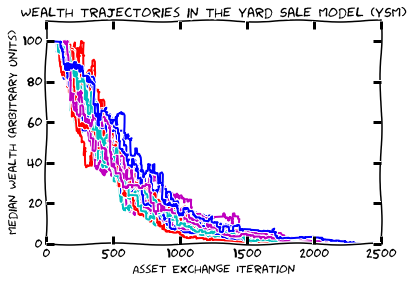

In [6]:
for m in multi_medians:
    plt.plot(m)
    
plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
plt.ylim(0, 110)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Median Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_median-xkcd.pdf", format="pdf")

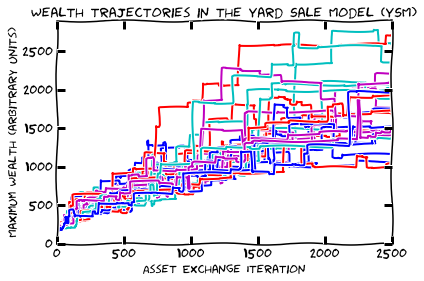

In [8]:
for i in range(len(multi_medians)):
    plt.plot(top[i])
    
plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
plt.ylim(0,2900)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_maximum-xkcd.pdf", format="pdf")